In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB 

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append('..\data')
    sys.path.append('..\src')

from utility import train_model, plot_alpha_score

import warnings
warnings.filterwarnings('ignore') 

SEED = 42

### Read Data

In [2]:
df = pd.read_csv(r"..\data\fake_or_real_news.csv")
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


### CountVectorizer

In [3]:
# Create a series to store the labels: y
y = df.label

# Create training and test sets
X_train, X_test, y_train, y_test =  train_test_split(
    df['text'], y, 
    test_size = 0.33,
    random_state=SEED
)

# Initialize a CountVectorizer object: count_vectorizer
count_vectorizer = CountVectorizer(stop_words='english') 

# Transform the training data using only the 'text' column values: count_train 
count_train = count_vectorizer.fit_transform(X_train.values)

# Transform the test data using only the 'text' column values: count_test 
count_test = count_vectorizer.transform(X_test.values)

# Print the first 10 features of the count_vectorizer
print(count_vectorizer.get_feature_names_out()[:10]) #it should be get_feature_names()

['00' '000' '0000' '000000031' '00000031' '0001' '000billion' '000ft'
 '000km' '001']


### TfidfVectorizer for text classification

In [4]:
# Initialize a TfidfVectorizer object: tfidf_vectorizer
# ignore terms that appear in more than 70% of the documents
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df = 0.7) 

# Transform the training data: tfidf_train 
tfidf_train = tfidf_vectorizer.fit_transform(X_train.values)

# Transform the test data: tfidf_test 
tfidf_test = tfidf_vectorizer.transform(X_test.values)

# Print the first 10 features of tfidf_vectorizer.
print(tfidf_vectorizer.get_feature_names_out()[:10])

# Print the first 5 vectors of the tfidf training data
print(tfidf_train.A[:5])

['00' '000' '0000' '000000031' '00000031' '0001' '000billion' '000ft'
 '000km' '001']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Inspecting the TF-IDF vectors

In [5]:
# Create the CountVectorizer DataFrame: count_df
count_df = pd.DataFrame(count_train.A, 
columns=count_vectorizer.get_feature_names_out())

# Print the head of count_df
count_df.head()

,00,000,0000,000000031,00000031,0001,000billion,000ft,000km,001,...,שתי,תאמצנה,תוצאה,תחל,תיירות,תנותק,תעודת,תתרכז,القادمون,عربي
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Create the TfidfVectorizer DataFrame: tfidf_df
tfidf_df = pd.DataFrame(tfidf_train.A, 
columns=tfidf_vectorizer.get_feature_names_out())

# Print the head of tfidf_df
tfidf_df.head()

,00,000,0000,000000031,00000031,0001,000billion,000ft,000km,001,...,שתי,תאמצנה,תוצאה,תחל,תיירות,תנותק,תעודת,תתרכז,القادمون,عربي
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# Calculate the difference in columns: difference
difference = set(tfidf_df.columns) - set(count_df.columns)
difference

# Check whether the DataFrames are equal
count_df.equals(tfidf_df)

False

### Training and testing the "fake news" model with CountVectorizer and a Multinomial Naive Bayes classifier

In [8]:
# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(count_train, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(count_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print("Testing Accuracy: {:.2f}".format(score))

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE','REAL'])
print("Confusion Matrix:\n", cm)

Testing Accuracy: 0.89
Confusion Matrix:
 [[913 158]
 [ 75 945]]


### Training and testing the "fake news" model with TfidfVectorizer and a Multinomial Naive Bayes classifier

In [9]:
# Create a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(tfidf_train, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print("Testing Accuracy: {:.2f}".format(score))

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE','REAL'])
print("Confusion Matrix:\n", cm)

Testing Accuracy: 0.82
Confusion Matrix:
 [[ 704  367]
 [  19 1001]]


In [10]:
type(y_train)

pandas.core.series.Series

### Tuning the hyperparameter (alpha) along with the Tfidf vectors

In [11]:
# Create the list of alphas: alphas
alphas = np.arange(0.1, 1, 0.1)
scores = []

# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    score = train_model(alpha, tfidf_train, tfidf_test, y_train, y_test)
    scores.append(score)
    print("Alpha: {:.1f}, Score: {:.2f}".format(alpha, score))

Alpha: 0.1, Score: 0.96
Alpha: 0.2, Score: 0.95
Alpha: 0.3, Score: 0.94
Alpha: 0.4, Score: 0.93
Alpha: 0.5, Score: 0.92
Alpha: 0.6, Score: 0.92
Alpha: 0.7, Score: 0.91
Alpha: 0.8, Score: 0.90
Alpha: 0.9, Score: 0.89


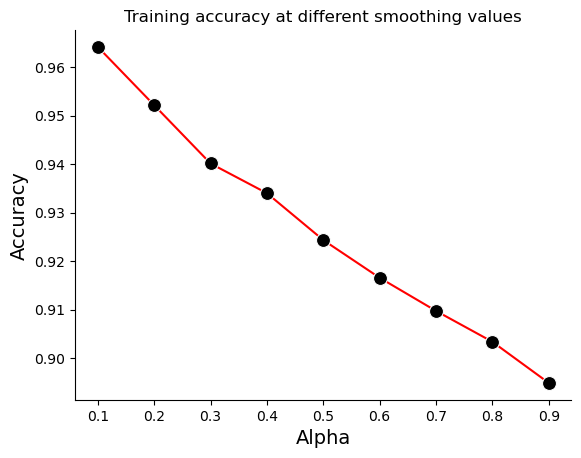

In [12]:
plot_alpha_score(alphas, scores, title="Training accuracy at different smoothing values")

In [13]:
# Create a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB(alpha=0.1)

# Fit the classifier to the training data
nb_classifier.fit(tfidf_train, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print("Testing Accuracy: {:.2f}".format(score))

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE','REAL'])
print("Confusion Matrix:\n", cm)

Testing Accuracy: 0.89
Confusion Matrix:
 [[902 169]
 [ 66 954]]


### Inspecting the model

Mapping the important vector weights back to actual words using some simple inspection techniques.

In [14]:
# Get the class labels: class_labels
class_labels = nb_classifier.classes_

# Extract the features: feature_names
feature_names = tfidf_vectorizer.get_feature_names_out()


# Zip the feature names together with the coefficient array and sort by weights: feat_with_weights
feat_with_weights = sorted(zip(nb_classifier.feature_log_prob_[0], feature_names))

# Print the first class label and the top 20 feat_with_weights entries
print(class_labels[0], feat_with_weights[:20])

# Print the second class label and the bottom 20 feat_with_weights entries
print(class_labels[1], feat_with_weights[-20:])

FAKE [(-12.515436580751103, '000000031'), (-12.515436580751103, '00000031'), (-12.515436580751103, '000ft'), (-12.515436580751103, '001'), (-12.515436580751103, '002'), (-12.515436580751103, '003'), (-12.515436580751103, '006'), (-12.515436580751103, '008'), (-12.515436580751103, '010'), (-12.515436580751103, '011'), (-12.515436580751103, '012'), (-12.515436580751103, '025'), (-12.515436580751103, '035'), (-12.515436580751103, '037'), (-12.515436580751103, '042'), (-12.515436580751103, '044'), (-12.515436580751103, '047'), (-12.515436580751103, '048'), (-12.515436580751103, '068'), (-12.515436580751103, '071')]
REAL [(-7.03223758437102, 'time'), (-7.03051731818679, 'emails'), (-7.024519934141251, 'war'), (-7.021685198256119, 'government'), (-7.002186123929194, 'media'), (-6.9810890094844495, 'donald'), (-6.9299289861334925, 'october'), (-6.913089881379916, 'like'), (-6.896266217931248, 'new'), (-6.857459199495485, 'just'), (-6.857441576167035, 'world'), (-6.7419992418376395, 'said'), (